<a href="https://colab.research.google.com/github/JunJul/TechPiont-Data-Science/blob/Master/Data_Science_Work_Prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Reading files

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv', index_col="User ID")

In [7]:
df.head()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
User ID,,,,,,
U001,5,80,3,10,120,20
U002,8,60,1,8,100,35
U003,3,90,0,6,90,5
U004,7,70,2,15,140,40
U005,2,50,5,3,60,8


## EDA

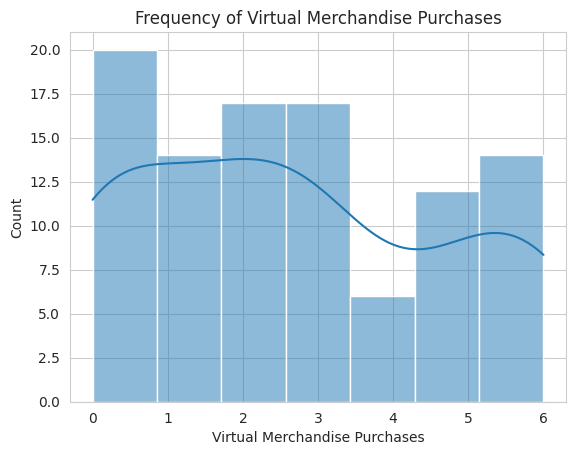

In [19]:
sns.histplot(df['Virtual Merchandise Purchases'], kde=True, bins=7)
plt.title('Frequency of Virtual Merchandise Purchases')
plt.show()

From the histogram plot of Virtual Merchandise Purchases, we observe that the number of purchases ranges from a minimum of 0 to a maximum of 6. The distribution does not follow a normal distribution, as it lacks the characteristic bell curve. Instead, the distribution appears more uniform, with purchases spread somewhat evenly across the range, indicating that users are equally likely to make any number of purchases within the given range. This suggests there isn't a dominant purchasing pattern, and users exhibit varying levels of engagement with virtual merchandise.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, U001 to U100
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Fan Challenges Completed                 100 non-null    int64
 1   Predictive Accuracy (%)                  100 non-null    int64
 2   Virtual Merchandise Purchases            100 non-null    int64
 3   Sponsorship Interactions (Ad Clicks)     100 non-null    int64
 4   Time on Live 360 (mins)                  100 non-null    int64
 5   Real-Time Chat Activity (Messages Sent)  100 non-null    int64
dtypes: int64(6)
memory usage: 9.5+ KB


### Logistic Regression

In [97]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

Since the maximum number of Virtual Merchandise Purchases is 6 and the second maximum is 5, we can treat these higher purchase amounts as an indicator of high engagement. By mapping values of 5 and 6 to 1 (indicating high engagement) and all other values to 0 (indicating lower engagement), we create a binary classification target.

This allows us to use logistic regression to investigate which variables are associated with a higher likelihood of making 5 or 6 purchases. By doing so, we can assess whether specific factors are predictive of higher virtual merchandise purchases.

In [166]:
y2 = np.where(df["Virtual Merchandise Purchases"].isin([5, 6]), 1, 0)

In [131]:
y = df['Virtual Merchandise Purchases']
X = df.drop('Virtual Merchandise Purchases', axis=1)

In [164]:
results = sm.Logit(y2, sm.add_constant(X)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.548459
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.04292
Time:                        01:21:29   Log-Likelihood:                -54.846
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.4258
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7535

In [163]:
scaled_X = X.copy()
scaler = StandardScaler()
scaled_X = scaler.fit_transform(scaled_X)
scaled_X = sm.add_constant(scaled_X)
results = sm.OLS(y2, scaled_X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9306
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.465
Time:                        01:21:14   Log-Likelihood:                -57.069
No. Observations:                 100   AIC:                             126.1
Df Residuals:                      94   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2600      0.044      5.887      0.0

I created two linear regression models to analyze the relationship between various features and Virtual Merchandise Purchases. In the first model, I did not scale the features, while in the second model, I applied feature scaling to standardize the input variables.

The explanatory variables include all the features except for Virtual Merchandise Purchases, which is used as the response variable.

Both models violate the goodness of fit assumption, as indicated by F-statistics p-values greater than 0.05, suggesting that the models do not adequately explain the variance in Virtual Merchandise Purchases. Furthermore, none of the explanatory variables are statistically significant predictors of the response variable.

However, one key insight from both models is that the coefficients for Fan Challenges Completed and Predictive Accuracy are positive. This implies that an increase in these variables is associated with a higher likelihood of users purchasing virtual merchandise 5 or 6 times. A positive coefficient suggests that as Fan Challenges Completed and Predictive Accuracy increase, the probability of users making these purchases also increases.

### Select K Best Fetaures

In [134]:
from sklearn.feature_selection import SelectKBest, chi2

#### Select 4 Best

In [135]:
selector = SelectKBest(chi2, k=4)
selector.fit(X, y)
X_new_name1 = list(selector.get_feature_names_out())
X_new_name1

['Predictive Accuracy (%)',
 'Sponsorship Interactions (Ad Clicks)',
 'Time on Live 360 (mins)',
 'Real-Time Chat Activity (Messages Sent)']

In [162]:
X_new1 = sm.add_constant(X[X_new_name1])
results = sm.Logit(y2, X_new1).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.560498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.02192
Time:                        01:20:58   Log-Likelihood:                -56.050
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.6425
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1251

#### Select 3 Best

In [154]:
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new_name2 = list(selector.get_feature_names_out())
X_new_name2

['Sponsorship Interactions (Ad Clicks)',
 'Time on Live 360 (mins)',
 'Real-Time Chat Activity (Messages Sent)']

In [161]:
X_new2 = sm.add_constant(X[X_new_name2])
results = sm.Logit(y2, X_new2).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.560517
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.02188
Time:                        01:20:43   Log-Likelihood:                -56.052
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.4738
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1930

#### Select 2 Best

In [157]:
selector = SelectKBest(chi2, k=2)
selector.fit(X, y)
X_new_name3 = list(selector.get_feature_names_out())
X_new_name3

['Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)']

In [160]:
X_new3 = sm.add_constant(X[X_new_name3])
results = sm.Logit(y2, X_new3).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.567586
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.009547
Time:                        01:20:29   Log-Likelihood:                -56.759
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.5786
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.1623      0.8

#### Select 1 Best

In [150]:
selector = SelectKBest(chi2, k=1)
selector.fit(X, y)
X_new_name4 = list(selector.get_feature_names_out())
X_new_name4

['Sponsorship Interactions (Ad Clicks)']

In [165]:
X_new4 = sm.add_constant(X[X_new_name4])
results = sm.Logit(y2, X_new4).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.571644
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.002465
Time:                        01:21:40   Log-Likelihood:                -57.164
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.5950
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.8821      0.3

I created four additional models and used a chi-square feature selection method to select the top k best features for predicting Virtual Merchandise Purchases. However, all the models continue to violate the goodness of fit assumption, indicating that the selected explanatory variables are not statistically significant predictors of Virtual Merchandise Purchases.

Despite this, we can still leverage the insight from the positive coefficients in earlier models, where Fan Challenges Completed and Predictive Accuracy showed a positive relationship with Virtual Merchandise Purchases. This suggests that users who complete more challenges and exhibit higher predictive accuracy are more likely to purchase virtual merchandise. We can build on this by conducting further analysis specifically focusing on these two variables to explore their potential influence on Virtual Merchandise Purchases.

### Choosing Challenges Completed and Predictive Accuracy

#### Logistic Regression

In [178]:
X_new4 = sm.add_constant(X[["Fan Challenges Completed", 'Predictive Accuracy (%)']])
results = sm.Logit(y2, X_new4).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.561676
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.01986
Time:                        02:57:59   Log-Likelihood:                -56.168
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.3204
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.8168      1.392     -1.305      0.192      -4.546

In [179]:
best_coef = X[["Fan Challenges Completed", 'Predictive Accuracy (%)']]
best_coef = scaler.fit_transform(best_coef)
best_coef = sm.add_constant(best_coef)
results = sm.Logit(y2, best_coef).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.561676
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.01986
Time:                        02:59:38   Log-Likelihood:                -56.168
converged:                       True   LL-Null:                       -57.306
Covariance Type:            nonrobust   LLR p-value:                    0.3204
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0755      0.234     -4.597      0.000      -1.534      -0.617
x1             0.3514      0.

I would use the scaled Challenges Completed and Predictive Accuracy because the their coefficients is greater.

#### Graphs

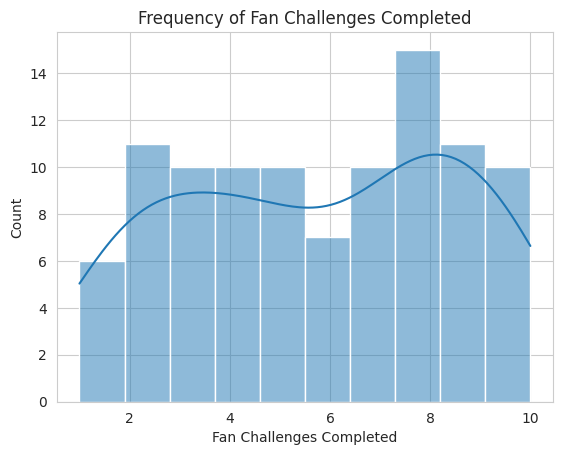

In [176]:
sns.histplot(df['Fan Challenges Completed'], kde=True, bins=10)
plt.title('Frequency of Fan Challenges Completed')
plt.show()

The max problem a user completes is 10 and the min is 1

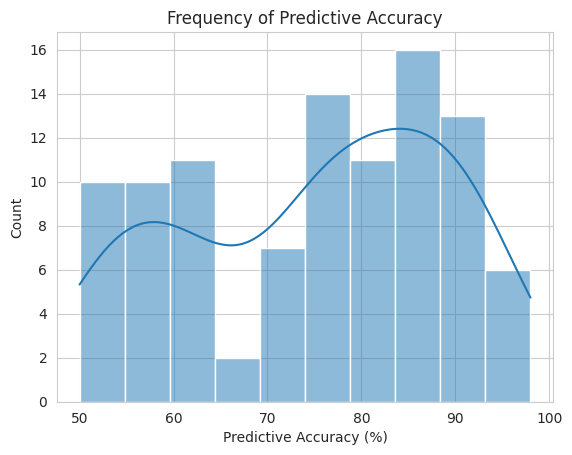

In [172]:
sns.histplot(df['Predictive Accuracy (%)'], kde=True, bins=10)
plt.title('Frequency of Predictive Accuracy')
plt.show()

The max accuracy a user can earn is 100% and the min is 50%

In [188]:
best_x = X[["Fan Challenges Completed", 'Predictive Accuracy (%)']]
best_x["y"] = y2

<ipython-input-188-b6196ebb97e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_x["y"] = y2


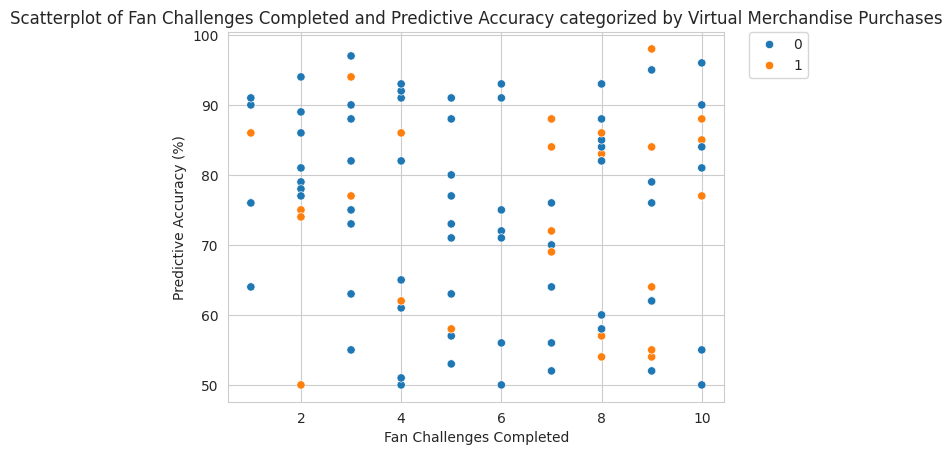

In [190]:
sns.scatterplot(data=best_x, x="Fan Challenges Completed", y="Predictive Accuracy (%)", hue="y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Scatterplot of Fan Challenges Completed and Predictive Accuracy categorized by Virtual Merchandise Purchases')
plt.show()

The orange data points represent users who purchased 5 or more Virtual Merchandise items, while the blue data points represent users who purchased fewer than 5.

From the scatterplot above, there appears to be a relationship between a user's Predictive Accuracy and the number of Fan Challenges Completed and their likelihood of purchasing Virtual Merchandise. Users with higher accuracy and more completed challenges tend to purchase more Virtual Merchandise. Although this relationship may be subtle and difficult to quantify directly, examining the scatterplot closely reveals a discernible pattern—suggesting that users who perform better in challenges may be more likely to make larger virtual purchases.

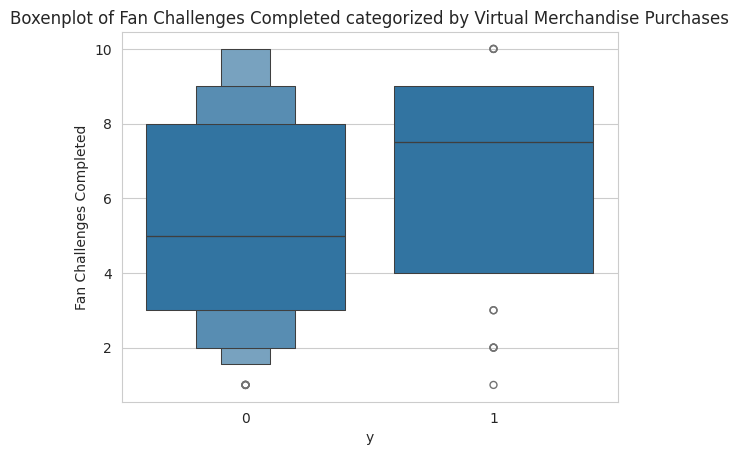

In [191]:
sns.boxenplot(data=best_x, x="y", y="Fan Challenges Completed")
plt.title('Boxenplot of Fan Challenges Completed categorized by Virtual Merchandise Purchases')
plt.show()

Label 1 represents users who purchased 5 or more Virtual Merchandise items, while Label 0 represents users who purchased fewer than 5.

There is a trend suggesting that users who complete more problems are more likely to purchase a higher number of Virtual Merchandise items. As the number of completed problems increases, the likelihood of purchasing 5 or more items seems to rise as well.

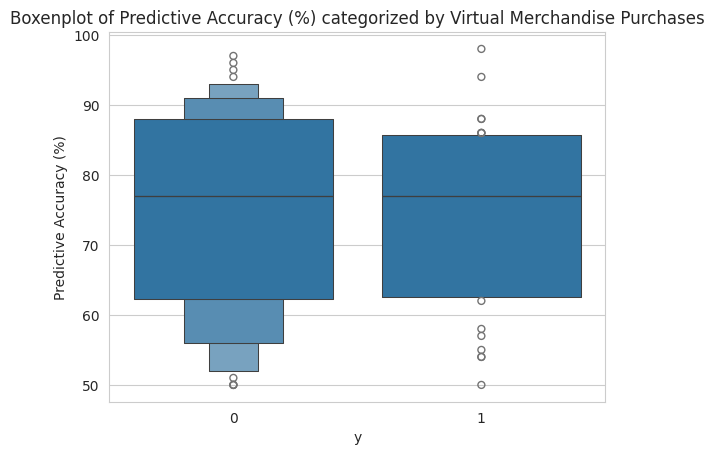

In [193]:
sns.boxenplot(data=best_x, x="y", y="Predictive Accuracy (%)")
plt.title('Boxenplot of Predictive Accuracy (%) categorized by Virtual Merchandise Purchases')
plt.show()

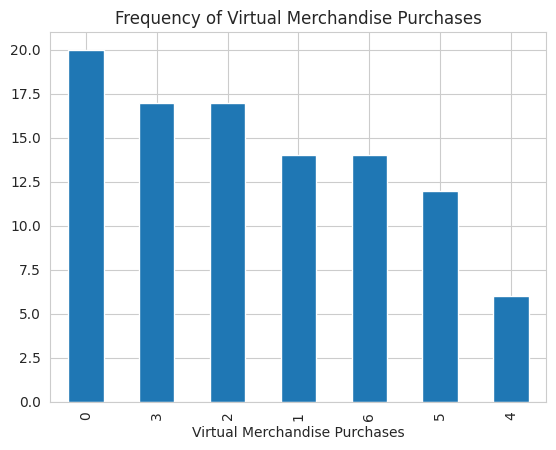

In [198]:
df["Virtual Merchandise Purchases"].value_counts().plot.bar()
plt.title('Frequency of Virtual Merchandise Purchases')
plt.show()

The boxplot of Predictive Accuracy (%) categorized by Virtual Merchandise Purchases does not clearly show the relationship between the two variables. This lack of clarity is due to the imbalance in the data: there are significantly fewer users who purchase 5 or more Virtual Merchandise items compared to those who purchase fewer than 5. This imbalance skews the visual representation, making it harder to observe meaningful patterns.

<ipython-input-212-37fb3f2a7acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_X["y"] = y


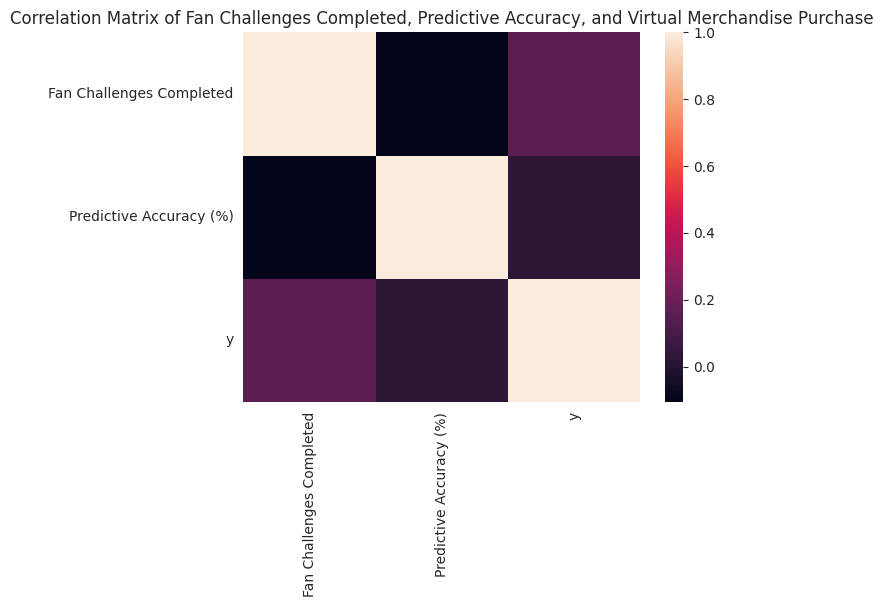

In [212]:
sub_X = X[["Fan Challenges Completed", 'Predictive Accuracy (%)']]
sub_X["y"] = y
sns.heatmap(sub_X.corr())
plt.title('Correlation Matrix of Fan Challenges Completed, Predictive Accuracy, and Virtual Merchandise Purchase')
plt.show()

This heatmap means there is some correlation between Fan Challenges Complete, Predictive Accuracy (%) and Virtual Merchandise Purchase.

#### KMeans

In [213]:
from sklearn.cluster import KMeans

In [216]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(best_x[["Fan Challenges Completed", 'Predictive Accuracy (%)']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
best_x['Cluster'] = clusters

# Display the first few rows with cluster labels
best_x.head()

<ipython-input-216-0259acb0def4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_x['Cluster'] = clusters


,Fan Challenges Completed,Predictive Accuracy (%),y,Cluster
User ID,,,,
U001,5,80,0,0
U002,8,60,0,2
U003,3,90,0,0
U004,7,70,0,2
U005,2,50,1,2


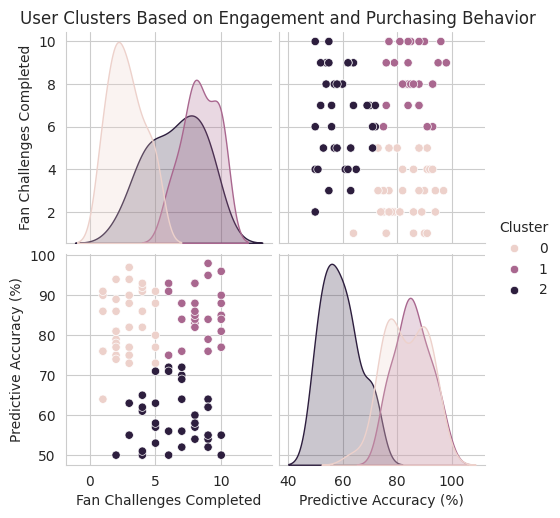

In [217]:
sns.pairplot(best_x, hue='Cluster', vars=['Fan Challenges Completed', 'Predictive Accuracy (%)'])
plt.suptitle('User Clusters Based on Engagement and Purchasing Behavior', y=1.02)
plt.show()

The KMeans model successfully categorizes three distinct types of users. However, the main insight from these two scatter plots is the red data points. In both scatter plots, a higher number of Fan Challenges completed and a higher Predictive Accuracy correlate with a higher frequency of purchasing Virtual Merchandise. This suggests that users with higher engagement and performance tend to make more purchases.

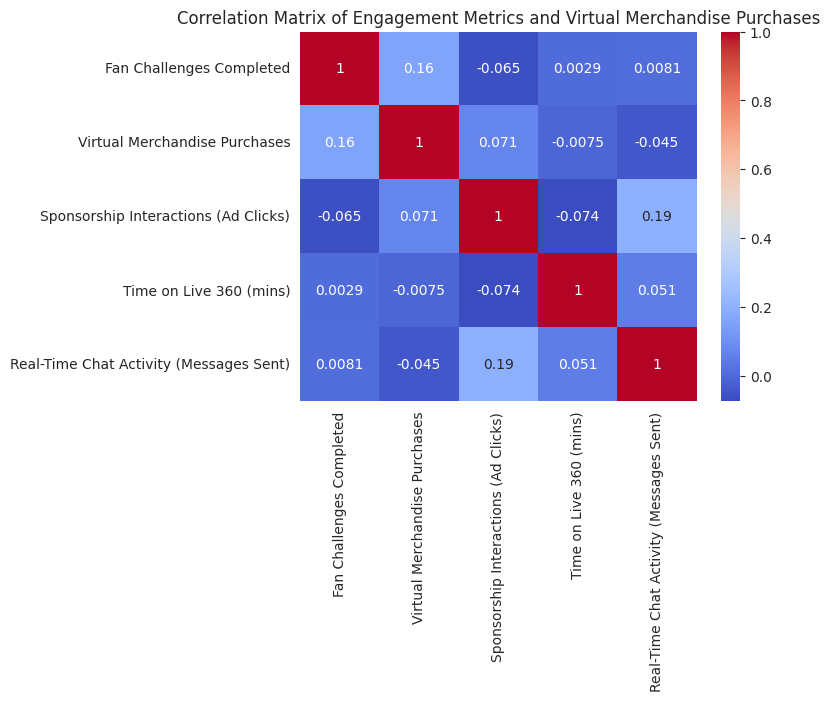

In [221]:
correlation_matrix = df[['Fan Challenges Completed', 'Virtual Merchandise Purchases',
                           'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)',
                           'Real-Time Chat Activity (Messages Sent)']].corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engagement Metrics and Virtual Merchandise Purchases')
plt.show()

- Fan Challenges Completed: Shows a weak positive correlation with virtual merchandise purchases (0.159) and a weak negative correlation with sponsorship interactions (-0.065). This suggests that completing fan challenges has a slight association with purchasing behavior but not with sponsorship interactions.

- Virtual Merchandise Purchases: Has a weak positive correlation with sponsorship interactions (0.071), indicating a slight association between purchasing merchandise and engaging with sponsorships.

- Sponsorship Interactions (Ad Clicks): Exhibits a weak positive correlation with real-time chat activity (0.191), suggesting that users who interact with sponsorships are slightly more active in chat.

- Time on Live 360 (mins) and Real-Time Chat Activity (Messages Sent): Both show very weak correlations with other activities, indicating limited association with merchandise purchases and sponsorship interactions.

## Conclusion

- Despite weak correlations and non-significant p-values, the analysis highlighted that completing fan challenges and Predictive Accuracy are slightly associated with merchandise purchases through logistic regression.
- The KMeans model highlighted that completing fan challenges and Predictive Accuracy are highly associated with merchandise purchases.
- The correlations between user activities during race events and their merchandise purchases or sponsorship interactions are generally weak. This suggests that these activities, as measured, do not strongly predict or influence purchasing behavior or sponsorship engagement.